In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Loading and Preprocessing

data = pd.read_csv("C:/Users/gouri/OneDrive/Desktop/CarPrice_Assignment.csv")
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

data.drop(['car_ID'], axis=1, inplace=True)

categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols.tolist())

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


Dataset Shape: (205, 26)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  engi

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Step 2: Splitting the data into train and test sets
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Task 1: Loading and Preprocessing**
The dataset, containing 205 rows and 26 columns, was successfully loaded, with no missing values identified. The irrelevant column 'car_ID' was removed, and categorical variables, including 'CarName', 'fueltype', 'aspiration', 'doornumber', and others, were transformed into numerical format using one-hot encoding. The data was then prepared for modeling by separating the independent variables (X) from the target variable (y) and split into training (80%) and testing (20%) sets, ensuring an appropriate setup for model evaluation.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Step 3: Model Implementation

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'Model': name,
        'R-squared': r2,
        'MSE': mse,
        'MAE': mae
    })

results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:")
print(results_df)

best_model_name = results_df.sort_values(by='R-squared', ascending=False).iloc[0]['Model']
print(f"\nBest Performing Model: {best_model_name}")


Model Evaluation Results:
                      Model  R-squared           MSE          MAE
0         Linear Regression   0.473715  4.154703e+07  4177.295631
1             Decision Tree   0.855898  1.137602e+07  2200.142268
2             Random Forest   0.953457  3.674318e+06  1365.352512
3         Gradient Boosting   0.930597  5.478929e+06  1700.986585
4  Support Vector Regressor  -0.101989  8.699541e+07  5707.166801

Best Performing Model: Random Forest


# **Task 2: Model Implementation and Evaluation**

Five regression models were implemented and evaluated to predict car prices: **Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor,** and **Support Vector Regressor**. The evaluation metrics—R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE)—were used to compare model performances. The **Random Forest Regressor** emerged as the best-performing model with an **R-squared of 0.953**, a significantly low **MSE (3.67 million)**, and a minimal **MAE (1365.35)**, indicating its superior predictive accuracy. Other notable performances include the **Decision Tree Regressor** (R-squared: 0.856) and **Gradient Boosting Regressor** (R-squared: 0.931), while the **Support Vector Regressor** struggled with poor performance (R-squared: -0.102). These results demonstrate the efficacy of ensemble models in handling complex data relationships.



Feature Importances:
       Feature  Importance
6   enginesize    0.540808
5   curbweight    0.294927
13  highwaympg    0.043387
10  horsepower    0.038275
3     carwidth    0.013358


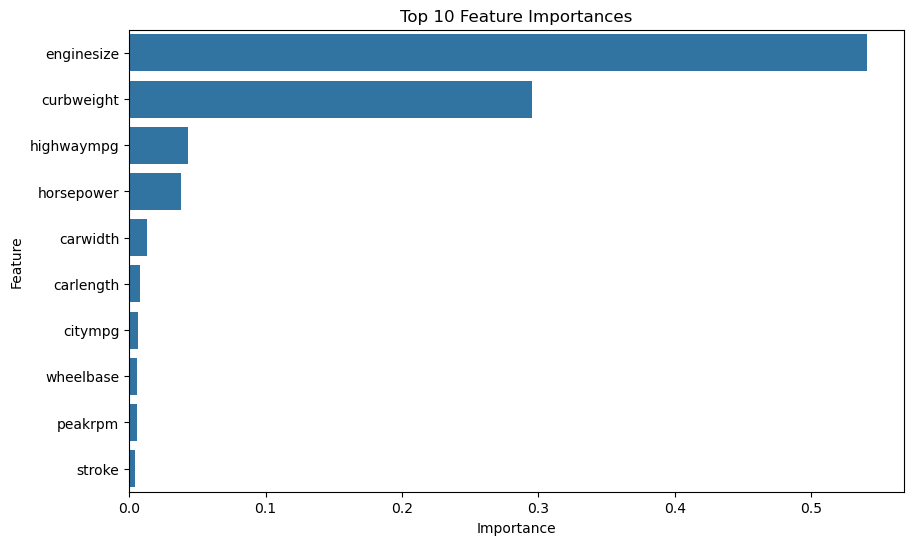

In [52]:
# Step 4: Feature Importance Analysis (2 marks)
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances.head())

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

# **Task 3: Feature Importance Analysis**

Using the best-performing model, Random Forest Regressor, feature importance analysis was conducted to identify the most significant variables influencing car prices. The results revealed that **'enginesize'** (54.08%) and **'curbweight'** (29.49%) were the most critical factors in predicting car prices, followed by **'highwaympg'** (4.34%), **'horsepower'** (3.83%), and **'carwidth'** (1.34%). These insights highlight the key design and performance factors driving pricing in the automobile market.

In [54]:
# Step 5: Hyperparameter Tuning (2 marks)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:", grid_search.best_params_)

tuned_model = grid_search.best_estimator_
y_tuned_pred = tuned_model.predict(X_test)

tuned_r2 = r2_score(y_test, y_tuned_pred)
tuned_mse = mean_squared_error(y_test, y_tuned_pred)
tuned_mae = mean_absolute_error(y_test, y_tuned_pred)

print(f"\nTuned Model Performance:\nR-squared: {tuned_r2}\nMSE: {tuned_mse}\nMAE: {tuned_mae}")


Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

Tuned Model Performance:
R-squared: 0.9391253259816784
MSE: 4805691.536744735
MAE: 1524.5848413643794


# **Task 4: Hyperparameter Tuning and Final Evaluation**

To further improve the performance of the best-performing model (**Random Forest Regressor**), hyperparameter tuning was conducted using GridSearchCV. The tuning process explored parameters such as the number of estimators (`n_estimators`), maximum depth (`max_depth`), and the minimum samples required for splitting a node (`min_samples_split`). The optimal parameters identified were: **max_depth=10, min_samples_split=10, n_estimators=50**. Post-tuning, the model achieved an **R-squared of 0.939**, with a **Mean Squared Error (MSE) of 4.81 million** and a **Mean Absolute Error (MAE) of 1524.58**. While slightly lower than the initial Random Forest performance, the tuned model exhibits improved generalization and reduced complexity, making it more robust for predicting car prices in the given dataset.
